# The study for HMC BIW PROJECT  

## M/L is used to estimate the value with parameters.  
## 


In [1]:
# import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# other utiles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib

In [2]:
# check the tensorflow version
print(tf.__version__)

2.1.0


In [3]:
# read training dataset
dataset_org = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_filtered.csv')

# 1. M/L model for Area

In [4]:
# make an instance for dataset
dataset = dataset_org
# extract the columns from the dataset
column_names = dataset.columns
# dataset의 column_names 업데이트
# 1. 행번호(row number)로 선택하는 방법 (.iloc)
# 2. label이나 조건표현으로 선택하는 방법 (.loc)
#dataset = dataset.loc[:,column_names]
# check dataset
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area,Pelvic
0,598,1060,862,525,886,754,830,883,1270,879,...,676,561,992,884,1180,782,1040,507,1189.339496,67.741856
1,848,475,644,1090,1080,1010,819,1160,1130,1170,...,846,1100,653,626,1310,493,540,1270,580.268547,68.085726
2,1230,1260,1240,1150,960,579,1010,533,875,784,...,872,949,548,727,1270,1110,492,910,618.505579,68.112703
3,1160,991,673,1080,1240,1070,851,1080,1030,1290,...,885,1250,881,605,1310,517,719,477,719.247607,68.188095
4,1050,541,511,676,733,489,814,954,770,657,...,492,1240,804,1270,505,1110,555,1190,445.777822,68.269615


In [5]:
# remove Pelvic culumn from the dataset
dataset.pop("Pelvic")
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area
0,598,1060,862,525,886,754,830,883,1270,879,...,1250,676,561,992,884,1180,782,1040,507,1189.339496
1,848,475,644,1090,1080,1010,819,1160,1130,1170,...,933,846,1100,653,626,1310,493,540,1270,580.268547
2,1230,1260,1240,1150,960,579,1010,533,875,784,...,741,872,949,548,727,1270,1110,492,910,618.505579
3,1160,991,673,1080,1240,1070,851,1080,1030,1290,...,1220,885,1250,881,605,1310,517,719,477,719.247607
4,1050,541,511,676,733,489,814,954,770,657,...,1030,492,1240,804,1270,505,1110,555,1190,445.777822


In [6]:
# make training & test dataset
# for training, 60% is used for training.
# sampling is by random

# DataFrame.sample(self: ~ FrameOrSeries, n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
# Parameters
# n; int, optional
#    Number of items from axis to return. Cannot be used with frac. Default = 1 if frac = None.
# frac; float, optional
#    Fraction of axis items to return. Cannot be used with n.
# replace; bool, default False
#    Allow or disallow sampling of the same row more than once.
# weights; str or ndarray-like, optional
#   Default ‘None’ results in equal probability weighting. If passed a Series, will align with target object on index. Index values in weights not found in sampled object will be ignored and index values in sampled object not in weights will be assigned weights of zero. If called on a DataFrame, will accept the name of a column when axis = 0. Unless weights are a Series, weights must be same length as axis being sampled. If weights do not sum to 1, they will be normalized to sum to 1. Missing values in the weights column will be treated as zero. Infinite values not allowed.
# random_state; int or numpy.random.RandomState, optional
#   Seed for the random number generator (if int), or numpy RandomState object.
# axis; {0 or ‘index’, 1 or ‘columns’, None}, default None
#   Axis to sample. Accepts axis number or name. Default is stat axis for given data type (0 for Series and DataFrames). 

# DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

# Training & test dataset
train_dataset = dataset.sample(frac=0.7)
test_dataset = dataset.drop(train_dataset.index)	

train_dataset.head()


,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area
2273,1060,1120,1240,638,1080,870,921,487,1210,690,...,734,969,1250,1250,594,731,608,1130,845,1725.582591
1871,853,902,627,592,668,596,953,967,1200,867,...,551,1310,816,1310,1090,778,889,539,1120,917.199878
73,706,990,1060,1210,1100,904,606,689,1310,657,...,1120,553,970,544,1240,1260,848,550,873,1622.716264
949,904,1150,1260,786,1240,585,1190,477,1060,1010,...,1140,630,726,1090,891,1120,611,1100,1250,1614.912944
1507,1190,1210,792,657,1310,514,473,575,843,511,...,1070,982,1230,708,710,518,1220,527,1260,246.059637


In [7]:
# data 산포 분석

# seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
# Parameters
# dataDataFrame
# Tidy (long-form) dataframe where each column is a variable and each row is an observation.

# huestring (variable name), optional
# Variable in data to map plot aspects to different colors.

# hue_orderlist of strings
# Order for the levels of the hue variable in the palette

# palettedict or seaborn color palette
# Set of colors for mapping the hue variable. If a dict, keys should be values in the hue variable.

# varslist of variable names, optional
# Variables within data to use, otherwise use every column with a numeric datatype.

# {x, y}_varslists of variable names, optional
# Variables within data to use separately for the rows and columns of the figure; i.e. to make a non-square plot.

# kind{‘scatter’, ‘reg’}, optional
# Kind of plot for the non-identity relationships.

# diag_kind{‘auto’, ‘hist’, ‘kde’, None}, optional
# Kind of plot for the diagonal subplots. The default depends on whether "hue" is used or not.

# markerssingle matplotlib marker code or list, optional
# Either the marker to use for all datapoints or a list of markers with a length the same as the number of levels in the hue variable so that differently colored points will also have different scatterplot markers.

# heightscalar, optional
# Height (in inches) of each facet.

# aspectscalar, optional
# Aspect * height gives the width (in inches) of each facet.

# cornerbool, optional
# If True, don’t add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.

# dropnaboolean, optional
# Drop missing values from the data before plotting.

# {plot, diag, grid}_kwsdicts, optional
# Dictionaries of keyword arguments. plot_kws are passed to the bivariate plotting function, diag_kws are passed to the univariate plotting function, and grid_kws are passed to the PairGrid constructor.

# fig = sns.pairplot(train_dataset[["HLAYER01", "HLAYER02", "HLAYER03","HLAYER04","HLAYER05","Area"]], diag_kind="kde")	
# fig.savefig('foo.png')

In [8]:
# summarize the training data status

# DataFrame.describe(self: ~ FrameOrSeries, percentiles=None, include=None, exclude=None) 
# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop("Area")

train_stats = train_stats.transpose()
train_stats.tail()

,count,mean,std,min,25%,50%,75%,max
L11_FLG,1670.0,891.562275,256.079212,469.0,657.00,893.0,1120.0,1320.0
L11_WALL,1670.0,886.579641,258.309521,468.0,653.25,882.0,1120.0,1320.0
L12_CNR,1670.0,894.573653,257.162356,468.0,670.25,894.5,1130.0,1320.0
L12_FLG,1670.0,890.623353,264.400685,469.0,648.00,887.5,1140.0,1320.0
L12_WALL,1670.0,885.584431,260.699781,468.0,652.25,878.0,1120.0,1320.0


In [9]:
# make instances for dataset without the QoI
train_labels = train_dataset.pop('Area')
test_labels = test_dataset.pop('Area')

In [10]:
# normalization of each dataset instance

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data  = norm(test_dataset)

normed_train_data.tail()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L09_WALL,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL
537,-0.858028,0.062703,1.240995,-0.541641,0.256978,1.140194,-1.119344,-1.339543,0.654681,-1.188664,...,0.486095,-0.959647,-0.690952,0.554299,-0.142170,-1.064367,-0.447446,0.448846,-1.363927,-1.011065
1264,0.095636,-0.243808,1.581341,1.556123,0.167576,-1.465161,0.626189,0.449745,-1.549821,1.380301,...,-0.424621,-1.075450,1.446075,-0.832763,0.766138,-0.892545,-1.140413,-1.036597,-1.447135,-0.669676
83,1.433090,-1.337934,-0.040973,-0.372280,1.399769,-0.475590,0.468579,0.003393,-1.120523,-0.536721,...,-0.424621,-0.438533,-1.444515,-1.547663,0.282995,1.555916,0.710080,0.157202,1.359212,1.206045
247,0.541454,-1.450451,-1.425045,-0.110541,0.183124,0.599022,-0.938092,0.220747,-0.172974,-0.098212,...,-0.493789,0.626855,1.484719,-0.199454,-0.207877,-1.009696,-1.349465,1.148793,-1.450917,-1.275737
22,0.618987,1.246067,1.051915,-1.030478,0.661230,0.224068,1.414240,0.197459,-1.263623,-0.292243,...,1.139351,-0.924906,-0.528646,0.270670,-0.242664,-1.419726,1.290778,-1.491562,0.334253,1.359478


In [11]:
# M/L model building
# Regularizer는 최적화 과정 중에 각 층별 파라미터 또는 출력값에 대하여 페널티를 적용할 수 있게 해줍니다. 이러한 페널티는 네트워크가 최적화 하려는 손실 함수의 일부로 포함됩니다.
# Dense = 56(input) X 1(output) = 56

def build_model():
    model = keras.Sequential([
      layers.Dense(56, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.01), 
                   input_shape=[len(train_dataset.keys())]),
      layers.Dense(56, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.001)
                   ), 
      layers.Dense(1)
      ])
    #optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #optimizer = tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    model.compile(
      loss='mae',
      optimizer=optimizer,
      # 'mae', 'mse', 'mape',
      metrics=['mae'])

    return model

In [12]:
# create the model instance 
model_Area = build_model()
model_Area.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 56)                3192      
_________________________________________________________________
dense_1 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 57        
Total params: 6,441
Trainable params: 6,441
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Check the M/L model with small cases
# example_batch  = normed_train_data[:10]
example_batch  = normed_train_data[:5]
example_result = model_Area.predict(example_batch)
example_result

array([[0.8618366 ],
       [0.13516319],
       [1.3145584 ],
       [1.4026225 ],
       [0.6252841 ]], dtype=float32)

In [14]:
# Start training

# model.fit(data, labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))
# tf.keras.Model.fit에는 세 개의 중요한 매개변수가 있습니다:
# epochs: 훈련은 에포크(epoch)로 구성됩니다. 한 에포크는 전체 입력 데이터를 한번 순회하는 것입니다(작은 배치로 나누어 수행됩니다).
# batch_size: 넘파이 데이터를 전달하면 모델은 데이터를 작은 배치로 나누고 훈련 과정에서 이 배치를 순회합니다. 이 정수 값은 배치의 크기를 지정합니다. 전체 샘플 개수가 배치 크기로 나누어 떨어지지 않으면 마지막 배치의 크기는 더 작을 수 있습니다.
# validation_data: 모델의 프로토타입(prototype)을 만들 때는 검증 데이터(validation data)에서 간편하게 성능을 모니터링해야 합니다. 입력과 레이블(label)의 튜플을 이 매개변수로 전달하면 에포크가 끝날 때마다 추론 모드(inference mode)에서 전달된 데이터의 손실과 측정 지표를 출력합니다.

EPOCHS = 1000

history = model_Area.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=0,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          )


Epoch: 0, loss:1043.6147,  mae:1042.9949,  val_loss:978.5822,  val_mae:977.9296,  
....................................................................................................
Epoch: 100, loss:210.3509,  mae:206.0838,  val_loss:345.4411,  val_mae:341.1695,  
....................................................................................................
Epoch: 200, loss:98.9492,  mae:93.8209,  val_loss:297.1988,  val_mae:292.0704,  
....................................................................................................
Epoch: 300, loss:51.2697,  mae:45.5939,  val_loss:314.0374,  val_mae:308.3594,  
....................................................................................................
Epoch: 400, loss:31.3899,  mae:25.3874,  val_loss:327.8615,  val_mae:321.8618,  
....................................................................................................
Epoch: 500, loss:22.0420,  mae:15.8540,  val_loss:338.6237,  val_mae:332.4328,  
....

In [15]:
test_mae_score, test_mae_score = model_Area.evaluate(  normed_test_data, test_labels  )
test_mae_score

715/715 [==============================] - 0s 24us/sample - loss: 344.1031 - mae: 337.8914


337.89142

Text(0, 0.5, 'MAE [Area]')

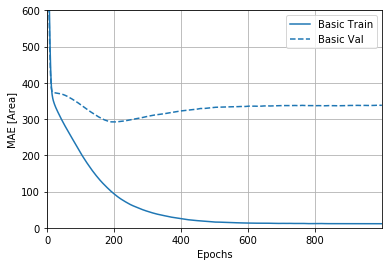

In [16]:
# 일반화, 과대적합, 과소적합 확인 
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 600])
plt.ylabel('MAE [Area]')

In [17]:
# early stop by val_mae

early_stop = keras.callbacks.EarlyStopping(monitor='mae', patience=10)

early_history = model_Area.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:17.6857,  mae:11.4730,  val_loss:344.4307,  val_mae:338.2181,  
.......................

Text(0, 0.5, 'MAE [Area]')

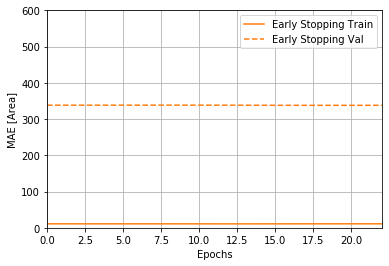

In [18]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 600])
plt.ylabel('MAE [Area]')

In [19]:
# model evaluate 
loss, mae = model_Area.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Area {:5.2f} [mm2]".format(mae))

715/715 - 0s - loss: 345.7477 - mae: 339.5359
Testing set Mean Abs Error: Area 339.54 [mm2]


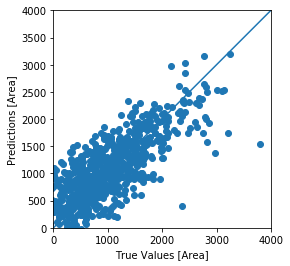

In [20]:
# model evaluate by curve
test_predictions = model_Area.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Area]')
plt.ylabel('Predictions [Area]')
lims = [0, 4000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# 2. M/L model for Pelvic displacement


In [21]:
# read training dataset
dataset_org = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_filtered.csv')
# make an instance for dataset
dataset = dataset_org
# extract the columns from the dataset
column_names = dataset.columns
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area,Pelvic
0,598,1060,862,525,886,754,830,883,1270,879,...,676,561,992,884,1180,782,1040,507,1189.339496,67.741856
1,848,475,644,1090,1080,1010,819,1160,1130,1170,...,846,1100,653,626,1310,493,540,1270,580.268547,68.085726
2,1230,1260,1240,1150,960,579,1010,533,875,784,...,872,949,548,727,1270,1110,492,910,618.505579,68.112703
3,1160,991,673,1080,1240,1070,851,1080,1030,1290,...,885,1250,881,605,1310,517,719,477,719.247607,68.188095
4,1050,541,511,676,733,489,814,954,770,657,...,492,1240,804,1270,505,1110,555,1190,445.777822,68.269615


In [22]:
# remove Pelvic culumn from the dataset
dataset.pop("Area")
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Pelvic
0,598,1060,862,525,886,754,830,883,1270,879,...,1250,676,561,992,884,1180,782,1040,507,67.741856
1,848,475,644,1090,1080,1010,819,1160,1130,1170,...,933,846,1100,653,626,1310,493,540,1270,68.085726
2,1230,1260,1240,1150,960,579,1010,533,875,784,...,741,872,949,548,727,1270,1110,492,910,68.112703
3,1160,991,673,1080,1240,1070,851,1080,1030,1290,...,1220,885,1250,881,605,1310,517,719,477,68.188095
4,1050,541,511,676,733,489,814,954,770,657,...,1030,492,1240,804,1270,505,1110,555,1190,68.269615


In [23]:
# make training & test dataset
# for training, 70% is used for training.
# sampling is by random
train_dataset = dataset.sample(frac=0.5)

# DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
test_dataset = dataset.drop(train_dataset.index)	
# test_dataset = dataset

train_dataset.head()


,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Pelvic
1544,538,829,692,1300,956,516,872,523,538,747,...,487,1090,1280,918,521,1080,698,1280,491,77.084615
2204,900,676,1250,566,917,575,806,530,1220,594,...,1110,502,926,1270,1270,807,618,697,572,79.188014
937,1160,635,810,1070,974,484,685,1060,953,741,...,513,928,558,990,1130,1160,742,483,516,75.404233
369,1270,1090,809,624,485,1150,1230,750,540,1200,...,496,1220,687,476,1240,639,915,768,936,73.098826
1783,616,1270,852,1170,884,535,589,1050,1260,1030,...,802,1100,918,907,1270,548,1180,1290,1230,77.697951


In [24]:
# data 산포 분석

# fig = sns.pairplot(train_dataset[["HLAYER01", "HLAYER02", "HLAYER03","HLAYER04","HLAYER05","Area"]], diag_kind="kde")	
# fig.savefig('foo.png')

In [25]:
# summarize the training data status

# DataFrame.describe(self: ~ FrameOrSeries, percentiles=None, include=None, exclude=None) 
# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop("Pelvic")

train_stats = train_stats.transpose()
train_stats.tail()

,count,mean,std,min,25%,50%,75%,max
L11_FLG,1192.0,891.373322,256.345149,469.0,655.75,897.5,1120.0,1320.0
L11_WALL,1192.0,884.327181,257.464199,469.0,655.00,885.0,1120.0,1320.0
L12_CNR,1192.0,896.170302,255.783452,468.0,677.75,899.5,1130.0,1320.0
L12_FLG,1192.0,894.364094,259.515269,469.0,663.75,893.0,1130.0,1320.0
L12_WALL,1192.0,891.556208,261.223538,468.0,657.75,885.0,1130.0,1320.0


In [26]:
# make instances for dataset without the QoI
train_labels = train_dataset.pop('Pelvic')
test_labels = test_dataset.pop('Pelvic')

In [27]:
# # normalization of each dataset instance
# # Question???
# # Although all parameters are material stiffness, normalization have to proceed? 
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data  = norm(test_dataset)

# normed_train_data.tail()

In [28]:
# create the model instance 
model_Pelvic = build_model()
model_Pelvic.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_4 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 57        
Total params: 6,441
Trainable params: 6,441
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Check the M/L model with small cases
# example_batch  = normed_train_data[:10]
example_batch  = normed_train_data[:5]
example_result = model_Pelvic.predict(example_batch)
example_result

array([[-1.8019481 ],
       [-0.7153698 ],
       [-0.8874936 ],
       [-0.64804274],
       [-0.7871927 ]], dtype=float32)

In [30]:
EPOCHS = 1000

history = model_Pelvic.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=0,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          )


Epoch: 0, loss:75.2921,  mae:74.6905,  val_loss:73.0553,  val_mae:72.4568,  
....................................................................................................
Epoch: 100, loss:1.3262,  mae:0.4444,  val_loss:4.7057,  val_mae:3.8252,  
....................................................................................................
Epoch: 200, loss:1.1662,  mae:0.4903,  val_loss:4.1339,  val_mae:3.4590,  
....................................................................................................
Epoch: 300, loss:1.0406,  mae:0.4976,  val_loss:3.6462,  val_mae:3.1039,  
....................................................................................................
Epoch: 400, loss:0.9639,  mae:0.5135,  val_loss:3.1835,  val_mae:2.7336,  
....................................................................................................
Epoch: 500, loss:0.8524,  mae:0.4701,  val_loss:2.8057,  val_mae:2.4239,  
..........................................

In [31]:
test_mae_score, test_mae_score = model_Pelvic.evaluate(  normed_test_data, test_labels  )
test_mae_score

1193/1193 [==============================] - 0s 21us/sample - loss: 1.4367 - mae: 1.2415


1.2414973

Text(0, 0.5, 'MAE [Pelvic displacement]')

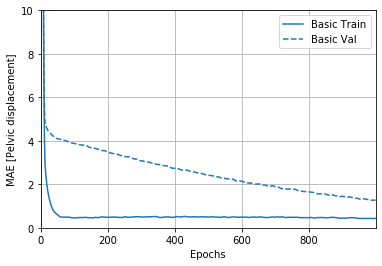

In [32]:
# 일반화, 과대적합, 과소적합 확인 
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Pelvic displacement]')

In [33]:
# early stop by val_mae

early_stop_pelvic = keras.callbacks.EarlyStopping(monitor='mae', patience=10)

early_history_pelvic = model_Pelvic.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.5701,  mae:0.3750,  val_loss:1.4215,  val_mae:1.2268,  
...........

In [34]:
plotter.plot({'Early Stopping': early_history_pelvic}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Pelvic displacement]')

ValueError: x and y must have same first dimension, but have shapes (11,) and (17,)

In [35]:
# model evaluate 
loss, mae = model_Pelvic.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Pelvic disp {:5.2f} [mm]".format(mae))

1193/1193 - 0s - loss: 1.4476 - mae: 1.2548
Testing set Mean Abs Error: Pelvic disp  1.25 [mm]


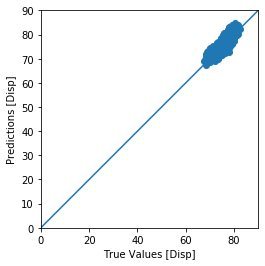

In [36]:
# model evaluate by curve
test_predictions = model_Pelvic.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Disp]')
plt.ylabel('Predictions [Disp]')
lims = [0, 90]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# 3. Optimization by Generic Algorithm

In [37]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential, load_model
from scipy import optimize
import time


In [42]:
# Number of Curve points
point = 2385
# Number of variables 
var = 56

In [43]:
# predict_func
# Mean square error between test and prediction

def predict_func(column_names):

    min_Area   = -100
    max_Area   = 3200
    min_Pelvic = 67
    max_Pelvic = 82

    for i in range( 0, len(column_names) ):
        if column_names[i] <= 515 :
            column_names[i] = 440
        elif 515 < column_names[i] <= 685:
            column_names[i] = 590
        elif 685 < column_names[i] <= 880:
            column_names[i] = 780
        elif 880 < column_names[i] <= 1080:
            column_names[i] = 980
        elif 1080 < column_names[i] <= 1290:
            column_names[i] = 1180
        elif 1290 < column_names[i] :
            column_names[i] = 1400
        

    PARTNO01 = column_names[0]
    PARTNO02 = column_names[1]
    PARTNO03 = column_names[2]
    PARTNO04 = column_names[3]
    PARTNO05 = column_names[4]
    PARTNO06 = column_names[5]
    PARTNO07 = column_names[6]
    PARTNO08 = column_names[7]
    PARTNO09 = column_names[8]
    PARTNO10 = column_names[9]

    PARTNO11 = column_names[10]
    PARTNO12 = column_names[11]
    PARTNO13 = column_names[12]
    PARTNO14 = column_names[13]
    PARTNO15 = column_names[14]
    PARTNO16 = column_names[15]
    PARTNO17 = column_names[16]
    PARTNO18 = column_names[17]
    PARTNO19 = column_names[18]
    PARTNO20 = column_names[19]

    PARTNO21 = column_names[20]
    PARTNO22 = column_names[21]
    PARTNO23 = column_names[22]
    PARTNO24 = column_names[23]
    PARTNO25 = column_names[24]
    PARTNO26 = column_names[25]
    PARTNO27 = column_names[26]
    PARTNO28 = column_names[27]
    PARTNO29 = column_names[28]
    PARTNO30 = column_names[29]

    PARTNO31 = column_names[30]
    PARTNO32 = column_names[31]
    PARTNO33 = column_names[32]
    PARTNO34 = column_names[33]
    PARTNO35 = column_names[34]
    PARTNO36 = column_names[35]
    PARTNO37 = column_names[36]
    PARTNO38 = column_names[37]
    PARTNO39 = column_names[38]
    PARTNO40 = column_names[39]

    PARTNO41 = column_names[40]
    PARTNO42 = column_names[41]
    PARTNO43 = column_names[42]
    PARTNO44 = column_names[43]
    PARTNO45 = column_names[44]

    PARTNO46 = column_names[45]
    PARTNO47 = column_names[46]
    PARTNO48 = column_names[47]
    PARTNO49 = column_names[48]
    PARTNO50 = column_names[49]

    PARTNO51 = column_names[50]
    PARTNO52 = column_names[51]
    PARTNO53 = column_names[52]
    PARTNO54 = column_names[53]
    PARTNO55 = column_names[54]
    PARTNO56 = column_names[55]

    # Prediction data standardize
    # Common variables
    PARTNO01N = norm(PARTNO01)
    PARTNO02N = norm(PARTNO02)
    PARTNO03N = norm(PARTNO03)
    PARTNO04N = norm(PARTNO04) 
    PARTNO05N = norm(PARTNO05)
    PARTNO06N = norm(PARTNO06)
    PARTNO07N = norm(PARTNO07)
    PARTNO08N = norm(PARTNO08)
    PARTNO09N = norm(PARTNO09) 
    PARTNO10N = norm(PARTNO10)

    PARTNO11N = norm(PARTNO11)
    PARTNO12N = norm(PARTNO12)
    PARTNO13N = norm(PARTNO13)
    PARTNO14N = norm(PARTNO14) 
    PARTNO15N = norm(PARTNO15)
    PARTNO16N = norm(PARTNO16)
    PARTNO17N = norm(PARTNO17)
    PARTNO18N = norm(PARTNO18)
    PARTNO19N = norm(PARTNO19) 
    PARTNO20N = norm(PARTNO20)

    PARTNO21N = norm(PARTNO21)
    PARTNO22N = norm(PARTNO22)
    PARTNO23N = norm(PARTNO23)
    PARTNO24N = norm(PARTNO24) 
    PARTNO25N = norm(PARTNO25)
    PARTNO26N = norm(PARTNO26)
    PARTNO27N = norm(PARTNO27)
    PARTNO28N = norm(PARTNO28)
    PARTNO29N = norm(PARTNO29) 
    PARTNO30N = norm(PARTNO30)

    PARTNO31N = norm(PARTNO31)
    PARTNO32N = norm(PARTNO32)
    PARTNO33N = norm(PARTNO33)
    PARTNO34N = norm(PARTNO34) 
    PARTNO35N = norm(PARTNO35)
    PARTNO36N = norm(PARTNO36)
    PARTNO37N = norm(PARTNO37)
    PARTNO38N = norm(PARTNO38)
    PARTNO39N = norm(PARTNO39) 
    PARTNO40N = norm(PARTNO40)

    PARTNO41N = norm(PARTNO41)
    PARTNO42N = norm(PARTNO42)
    PARTNO43N = norm(PARTNO43)
    PARTNO44N = norm(PARTNO44) 
    PARTNO45N = norm(PARTNO45)
    PARTNO46N = norm(PARTNO46)

    PARTNO47N = norm(PARTNO47)
    PARTNO48N = norm(PARTNO48)
    PARTNO49N = norm(PARTNO49)
    PARTNO50N = norm(PARTNO50) 
    PARTNO51N = norm(PARTNO51)
    PARTNO52N = norm(PARTNO52)
    PARTNO53N = norm(PARTNO53)
    PARTNO54N = norm(PARTNO54)
    PARTNO55N = norm(PARTNO55) 
    PARTNO56N = norm(PARTNO56)    

    # Result of prediction data   
    predict_cur_Area = model_Area.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]
    predict_cur_Pelvic = model_Pelvic.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]        
 

    norm_Area   = (predict_cur_Area   - min_Area  )/(max_Area   - min_Area  )
    norm_Pelvic = (predict_cur_Pelvic - min_Pelvic)/(max_Pelvic - min_Pelvic)
    print(predict_cur_Area, predict_cur_Pelvic)

    weight1 = 0.5
    weight2 = 0.5

    return   weight1 * norm_Area + weight2 * norm_Pelvic 


In [44]:
# bnds; doundary conditions
# Parameter of Boundary conditions
bnds = [( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),                       
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 )
]
print(len(bnds))

56


In [45]:
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')



3] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-526.59845] [73.98775]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.23316]
[-463.7403] [70.233

In [46]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([ 842.24693875, 1002.91781039, 1278.16613167,  748.32330724,
         870.96656296,  867.46501033, 1224.96430116,  553.65666361,
         714.08249652,  754.28852331, 1219.45731082,  609.60224666,
         467.50073604,  723.11430533,  951.34414194,  611.11256001,
         796.18720563, 1312.63509277, 1080.54101741,  947.38777303,
         676.83875118, 1281.74264295, 1257.13780602,  876.30916457,
         561.59860782, 1131.81040939, 1259.53294368, 1033.57294188,
         821.14250891,  883.43283966,  770.90048388,  729.73222079,
        1066.8849889 ,  739.3894833 ,  686.64845759, 1089.71939203,
        1070.66591931,  781.35556678,  529.96548088,  616.47159656,
        1329.02459754, 1288.99159306,  747.49441221, 1137.74189047,
        1006.86344779,  876.13166822, 1224.77908988,  787.73909195,
         703.36742329, 1094.4507738 ,  646.76345207, 1248.38342597,
         823.87741745,  552.28078986,  858.9898178 , 1252.25859449]),
 0.06446965038776398)

In [47]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 :
        minimum_best1bin_x[i] = 440
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 590
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 780
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 980
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 1180
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 1400
minimum_best1bin_x        

array([ 780.,  980., 1180.,  780.,  780.,  780., 1180.,  590.,  780.,
        780., 1180.,  590.,  440.,  780.,  980.,  590.,  780., 1400.,
       1180.,  980.,  590., 1180., 1180.,  780.,  590., 1180., 1180.,
        980.,  780.,  980.,  780.,  780.,  980.,  780.,  780., 1180.,
        980.,  780.,  590.,  590., 1400., 1180.,  780., 1180.,  980.,
        780., 1180.,  780.,  780., 1180.,  590., 1180.,  780.,  590.,
        780., 1180.])

In [48]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 : 
        minimum_best1bin_x[i] = 11380000
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 11130000
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 11160000
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 11190000
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 11210000
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 60101030
minimum_best1bin_x        

array([11160000., 11190000., 11210000., 11160000., 11160000., 11160000.,
       11210000., 11130000., 11160000., 11160000., 11210000., 11130000.,
       11380000., 11160000., 11190000., 11130000., 11160000., 60101030.,
       11210000., 11190000., 11130000., 11210000., 11210000., 11160000.,
       11130000., 11210000., 11210000., 11190000., 11160000., 11190000.,
       11160000., 11160000., 11190000., 11160000., 11160000., 11210000.,
       11190000., 11160000., 11130000., 11130000., 60101030., 11210000.,
       11160000., 11210000., 11190000., 11160000., 11210000., 11160000.,
       11160000., 11210000., 11130000., 11210000., 11160000., 11130000.,
       11160000., 11210000.])

In [49]:
for val in minimum_best1bin_x:
    print(val)


11160000.0
11190000.0
11210000.0
11160000.0
11160000.0
11160000.0
11210000.0
11130000.0
11160000.0
11160000.0
11210000.0
11130000.0
11380000.0
11160000.0
11190000.0
11130000.0
11160000.0
60101030.0
11210000.0
11190000.0
11130000.0
11210000.0
11210000.0
11160000.0
11130000.0
11210000.0
11210000.0
11190000.0
11160000.0
11190000.0
11160000.0
11160000.0
11190000.0
11160000.0
11160000.0
11210000.0
11190000.0
11160000.0
11130000.0
11130000.0
60101030.0
11210000.0
11160000.0
11210000.0
11190000.0
11160000.0
11210000.0
11160000.0
11160000.0
11210000.0
11130000.0
11210000.0
11160000.0
11130000.0
11160000.0
11210000.0
